# Prey Capture in Autism-Related Rat Models: Behavioral Phenotyping of Arid1b, Grin2b, and Scn2a Strains

This tutorial shows how to access the data related to [EMBER:000204](https://dandi.emberarchive.org/dandiset/000204) using pynwb.

This dataset contains behavioral data from the prey capture experiment, part of the [Rat Behavioural Phenotyping Pipeline Methodologies](https://sidb.org.uk/facilities/rat-behavioural-phenotyping-pipeline/).


**Contents:**
- [Reading NWBFile locally](#read-nwb)
- [Access Subject Metadata](#access-subject)
- [Access Devices Metadata](#access-devices)
- [Access Behavioral Videos](#access-behavior)
- [Access USV and Detection Data](#access-usv)


# Select the subject and session to load

In [ ]:
emberset_id = "000204"
session_id = "PC_TestD4"
subject_id = "252_Arid1b(1)"

# Reading an NWB file locally <a id="read-nwb"></a>

This section demonstrates how to read an NWB file using `pynwb`.

Based on the [NWB File Basics](https://pynwb.readthedocs.io/en/stable/tutorials/general/plot_file.html#sphx-glr-tutorials-general-plot-file-py) tutorial from [PyNWB](https://pynwb.readthedocs.io/en/stable/#).

An [NWBFile](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.NWBFile) represents a single session of an experiment. Each NWBFile must have a `session description`, `identifier`, and `session start time`.

Reading is carried out using the [NWBHDF5IO](https://pynwb.readthedocs.io/en/stable/pynwb.html#pynwb.NWBHDF5IO) class. To read the NWB file use the read mode ("r") to retrieve an NWBFile object.

In [ ]:
from pynwb import NWBHDF5IO
from pathlib import Path

# Define the path to the NWB file
directory = Path("D:/kind_lab_conversion_nwb/prey_capture")
nwbfile_path = directory / f"sub-{subject_id}_ses-{session_id}.nwb"
io = NWBHDF5IO(path=nwbfile_path, load_namespaces=True)
nwbfile = io.read()

In [2]:
print(nwbfile.experiment_description)

This experiment is part of the Rat Behavioural Phenotyping Pipeline Methodologies https://sidb.org.uk/facilities/rat-behavioural-phenotyping-pipeline/.
As an initial effort to characterize the rat lines, these models are being behaviorally phenotyped at SIDB.
Rat models are phenotyped according to a rigorous pipeline that assesses behaviours relevant to autism with intellectual disability, such as social and motor skills, and learning and sensory processing.
Different cohorts of rats are run through different subsets of tasks to overcome potential order effects on behaviours and to limit the number of tasks each animal is put through.
This experiment investigated prey capture behavior in different rat models
(Arid1b: https://rgd.mcw.edu/rgdweb/report/strain/main.html?id=14394518,
Grin2b: https://rgd.mcw.edu/rgdweb/report/strain/main.html?id=14394515,
Scn2a: https://rgd.mcw.edu/rgdweb/report/strain/main.html?id=25394530) using live crickets.
The experimenter, not present in the same roo

In [3]:
print(nwbfile.session_description)

Week 2 Experimental Day 4. Live cricket hunting.
4-5 trials per day, 2 min max duration per trial.
Rat in starting cylinder 15s, live cricket placed in opposite corner.
The rat was given 2 min to catch the cricket.
The rat was removed from the arena when the cricket was eaten or if the 2 min trial duration elapsed
(whichever happens first). Crickets were not reused.
The arena was cleared of all debris and wiped with water between trials.
Rats were held in the holding bucket between trials, the intertrial interval was approx. 1-2 min.
Ultrasonic vocalizations recorded.



Importantly, the `session start time` is the reference time for all timestamps in the file. For instance, an event with a timestamp of 0 in the file means the event occurred exactly at the session start time.

The `session_start_time` is extracted from the filename of the video during conversion.

In [4]:
print(nwbfile.session_start_time)

2022-08-11 10:39:11+01:00


# Access Subject Metadata <a name="access-subject"></a>

This section demonstrates how to access the [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field in an NWB file.

The [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field can be accessed as `nwbfile.subject`.


In [5]:
nwbfile.subject

subject pynwb.file.Subject at 0x1445071292752
Fields:
  age__reference: birth
  date_of_birth: 2022-04-13 00:00:00+02:00
  sex: M
  species: Rattus norvegicus
  subject_id: 252_Arid1b(1)

# Access Devices Metadata <a name="access-devices"></a>

This section demonstrates how to access the [Device](https://pynwb.readthedocs.io/en/stable/pynwb.device.html#module-pynwb.device) field in an NWB file.

The [Device](https://pynwb.readthedocs.io/en/stable/pynwb.device.html#module-pynwb.device) field can be accessed as `nwbfile.devices`.

In [6]:
nwbfile.devices["Arena"]

Arena pynwb.device.Device at 0x1445074615712
Fields:
  description: Square arena (100x100 cm) with 50cm high white walls and wood-lined floor
  manufacturer: Example Manufacturer

In [7]:
nwbfile.devices["BehavioralCamera"]

BehavioralCamera pynwb.device.Device at 0x1445074603040
Fields:
  description: CCTV camera mounted on ceiling above chambers for behavioral recording
  manufacturer: Example Manufacturer

In [8]:
nwbfile.devices["USVMicrophone"]

USVMicrophone pynwb.device.Device at 0x1445074616048
Fields:
  description: M500 USB Pettersson microphone for recording ultrasonic vocalizations, hanging approx. 1m above the arena.
  manufacturer: Pettersson, Wildlife Services UK

# Access Behavioral Video <a name="access-behavior"></a>

The behavioral videos are stored as an external `ImageSeries` in the NWB file. The number and naming of videos depend on the session type (e.g., "Hab" or habituation sessions have one video, "Test" sessions have 4-5 videos).

In [9]:
# List all behavioral video acquisitions
for name in nwbfile.acquisition:
    if "BehavioralVideo" in name:
        print(name)

BehavioralVideoTestTrial1
BehavioralVideoTestTrial2
BehavioralVideoTestTrial3
BehavioralVideoTestTrial4


In [10]:
video = nwbfile.acquisition["BehavioralVideoTestTrial1"]
video

Data type,uint8
Shape,"(0, 0, 0)"
Array size,0.00 bytes
Chunk shape,None
Compression,None
Compression opts,None
Compression ratio,undefined
Data type,object
Shape,"(1,)"
Array size,8.00 bytes
Chunk shape,None


The video filepath:

In [11]:
video.external_file[0]

'/Volumes/T9/Behavioural Pipeline/Prey Capture/Arid1b/Arid1b(1)_PC/TestD4/converted/2022-08-11 10-39-11_252_4.1.mp4'

The metadata of the device used to record the behavioral video:

In [12]:
video.device

BehavioralCamera pynwb.device.Device at 0x1445074603040
Fields:
  description: CCTV camera mounted on ceiling above chambers for behavioral recording
  manufacturer: Example Manufacturer

# Access USV and Detection Data <a name="access-usv"></a>

If present, USV (ultrasonic vocalization) audio files are stored in the NWB file as acquisitions:


In [13]:
# List all USV audio files
for name in nwbfile.acquisition:
    if "AcousticWaveformSeries" in name:
        print(name)

AcousticWaveformSeriesTestTrial1
AcousticWaveformSeriesTestTrial2
AcousticWaveformSeriesTestTrial3
AcousticWaveformSeriesTestTrial4


In [14]:
nwbfile.acquisition["AcousticWaveformSeriesTestTrial1"]

Data type,int32
Shape,"(22965248,)"
Array size,87.61 MiB
Chunk shape,"(2500000,)"
Compression,gzip
Compression opts,4
Compression ratio,2.481624586933915


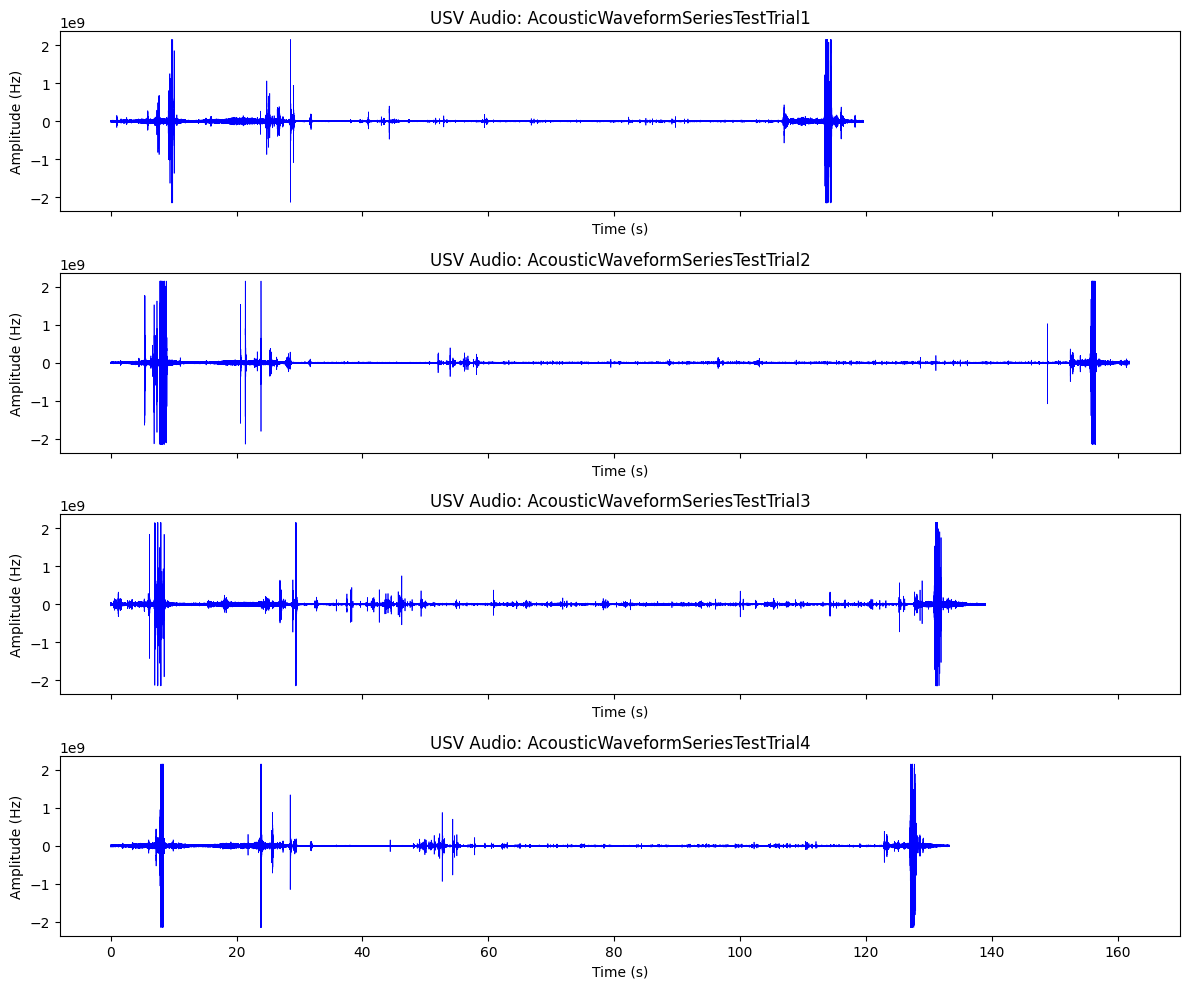

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# List all audio acquisitions
audio_keys = [key for key in nwbfile.acquisition if "AcousticWaveformSeries" in key]

# Create subplots
fig, axes = plt.subplots(len(audio_keys), 1, figsize=(12, 10), sharex=True)

if len(audio_keys) == 1:
    axes = [axes]  # Ensure axes is iterable for a single subplot

for ax, key in zip(axes, audio_keys):
    # Access the audio data and sampling rate
    audio_data = nwbfile.acquisition[key].data[:]
    sampling_rate = nwbfile.acquisition[key].rate

    # Generate time axis
    time_axis = np.arange(len(audio_data)) / sampling_rate

    # Plot the audio data
    ax.plot(time_axis, audio_data, color='blue', linewidth=0.5)
    ax.set_title(f"USV Audio: {key}")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Amplitude (Hz)")

plt.tight_layout()
plt.show()

The USV detections can be accessed as `nwbfile.processing["behavior"]["USV_detections_table"]`.

In [16]:
detections_table = nwbfile.processing["behavior"]["USV_detections_table"]
detections_table.to_dataframe()

,accept,score,box
id,,,
0,True,0.615794,"[133.49658203125, 30.64495086669922, 0.0879364..."
